In [15]:
# Importando módulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Lendo o dataset
tmdb = pd.read_csv("data/tmdb/tmdb_5000_movies.csv")
tmdb.head()

In [5]:
## Verificando as notas

# Variável CATEGÓRICA NOMINAL
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
## Analisando as notas de uma variável categórica

# Verificando a ocorrências das línguas
tmdb.original_language.value_counts()

# Transformando em dataframe
tmdb.original_language.value_counts().to_frame()

# Transformando em dataframe e colocando o index como coluna
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()

# Alterando as colunas
contagem_de_lingua.columns = ["original_language", "total"]

contagem_de_lingua.head()

<AxesSubplot:xlabel='original_language', ylabel='total'>

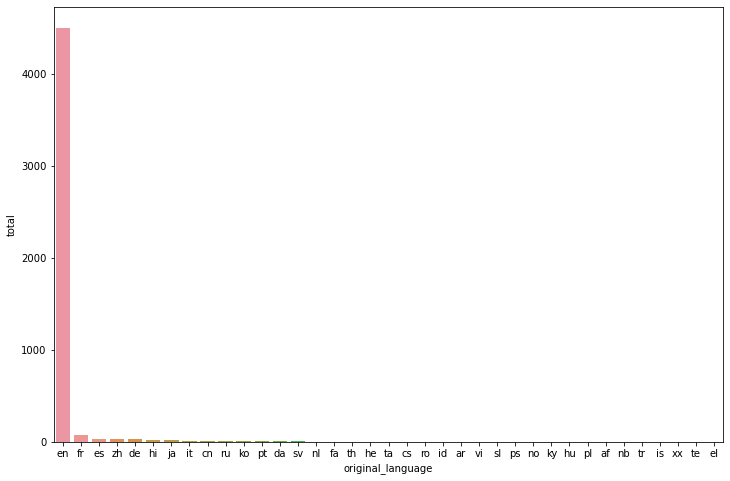

In [17]:
# Fazendo o plot
plt.figure(figsize=(12,8))
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

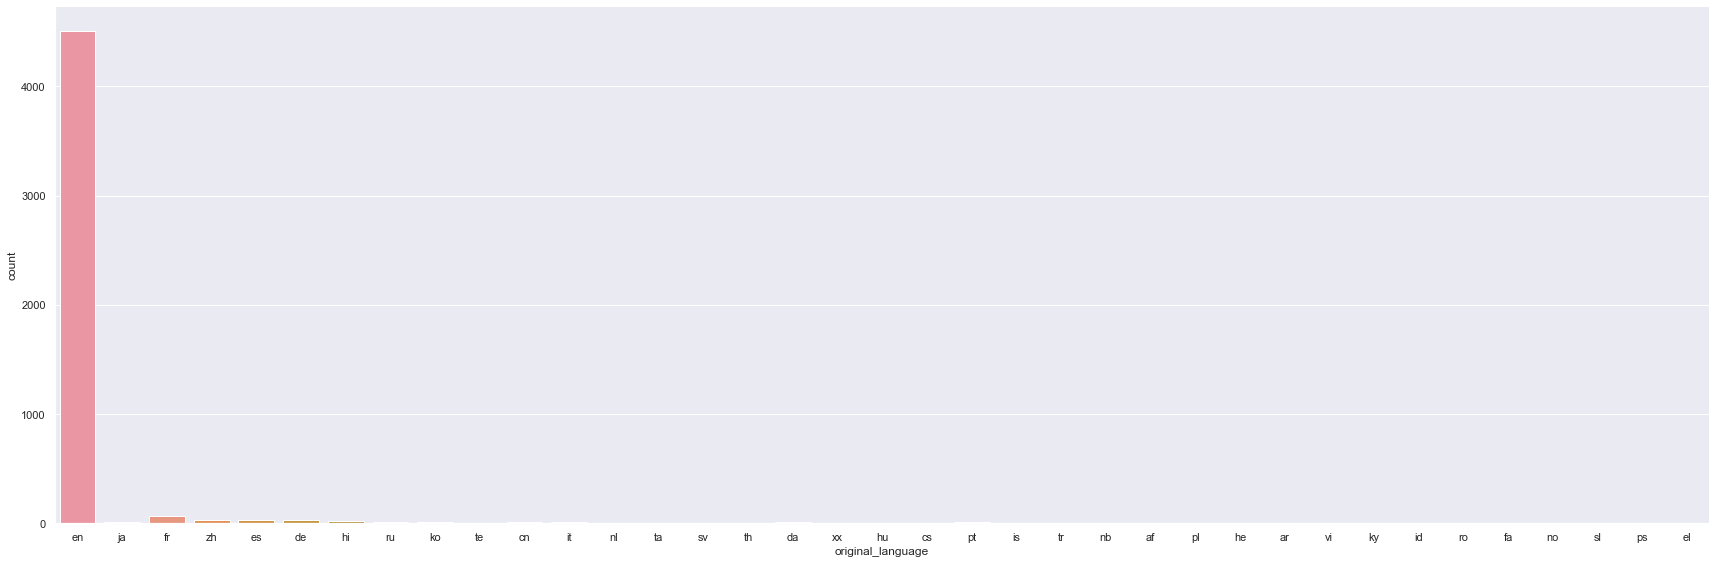

In [36]:
# Plotando de maneira mais fácil kk
sns.catplot(x="original_language", kind="count", data=tmdb, height=8, aspect=3)

In [40]:
# Inglês tem destaque frente às outras linguas, mas como mostrar isso?
# Inglês x outras línguas

total_por_lingua = tmdb["original_language"].value_counts()

# Total geral
total_geral = total_por_lingua.sum()

# Buscando a linha de valor 'en'
total_de_ingles = total_por_lingua.loc["en"]

# Total restante
total_resto = total_geral - total_de_ingles
print(total_de_ingles, total_resto)

4505 298


In [50]:
# Criando um dicionário com esses dados
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_resto]
}

# Transformando esses dados em um dataframe
dados = pd.DataFrame(dados)
dados.head()

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

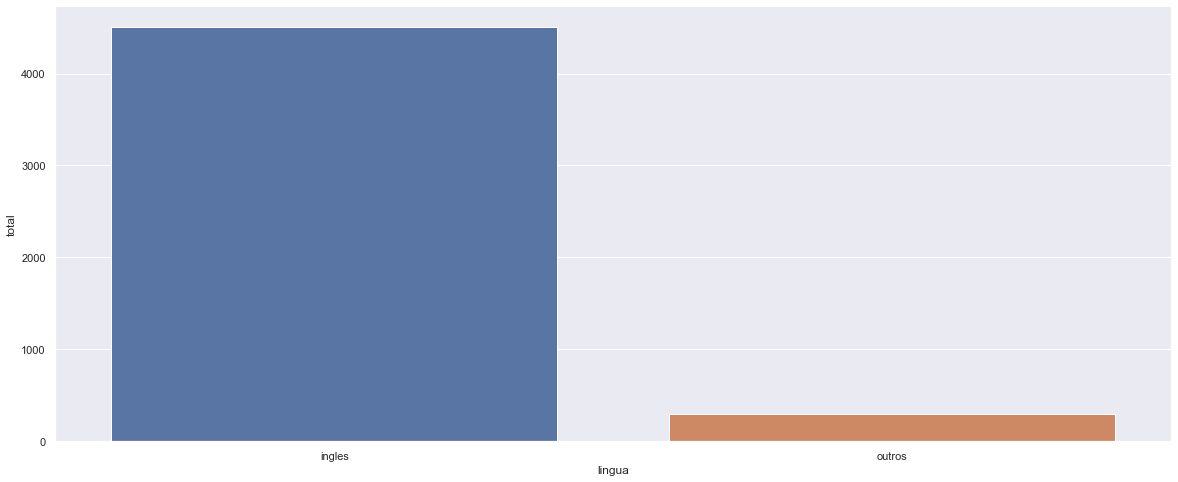

In [51]:
# Plot dos dados
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x1c668a7a460>,
 [Text(-1.177276094890901, 0.2324241734382013, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')],
 [Text(-0.6867443886863587, 0.13558076783895073, '93.8%'),
  Text(0.5886380460853802, -0.11621209360813456, '6.2%')])

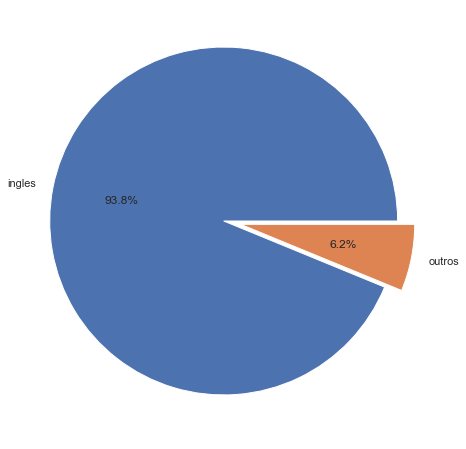

In [61]:
# Plot dos dados em pizza
explode = (0.1, 0)
plt.pie(dados["total"], explode=explode, labels=dados["lingua"], autopct="%1.1f%%")